In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


____________________________________________________
## CNN MODEL TESTING SECTION
____________________________________________________

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split

# Define paths to FER-2013 dataset
FER_PATH = '/content/drive/MyDrive/Colab Notebooks/SENIOR PROJECT/fer-2013/fer-2013-folders'
EMOTIONS = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
IMG_SIZE = 64  # Resize images to 64x64

def load_fer2013_data(base_path):
    images, labels = [], []
    for label, emotion in enumerate(EMOTIONS):
        for dataset in ['train', 'test']:
            folder = os.path.join(base_path, dataset, emotion)
            if not os.path.exists(folder):
                continue
            for img_name in os.listdir(folder):
                img_path = os.path.join(folder, img_name)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is None:
                    print(f"Skipping corrupted image: {img_path}")
                    continue
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)).astype('float32') / 255.0  # Normalize
                images.append(img)
                labels.append(label)

    return np.array(images).reshape(-1, IMG_SIZE, IMG_SIZE, 1), np.array(labels)

# Load dataset
fer_images, fer_labels = load_fer2013_data(FER_PATH)

# Ensure correct stratification (fix potential imbalance issue)
X_train, X_val, y_train, y_val = train_test_split(
    fer_images, fer_labels, test_size=0.2, stratify=fer_labels, random_state=42
)

# Data Augmentation (applied only to training data)
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# Improved CNN Model
cnn_model = keras.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 1)),  # Explicitly define input shape
    data_augmentation,  # Apply augmentation only during training
    layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.2),

    layers.Conv2D(128, (3, 3), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.3),

    layers.Conv2D(256, (3, 3), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(len(EMOTIONS), activation='softmax')  # FER-2013 has 7 emotion classes
])

# Compile with lower learning rate and improved optimizer
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
cnn_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_model.summary()

# Use callbacks for better training efficiency
callbacks = [
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
]

# Train the CNN model
cnn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=64, callbacks=callbacks)


KeyboardInterrupt: 

# Compile and Train the Model

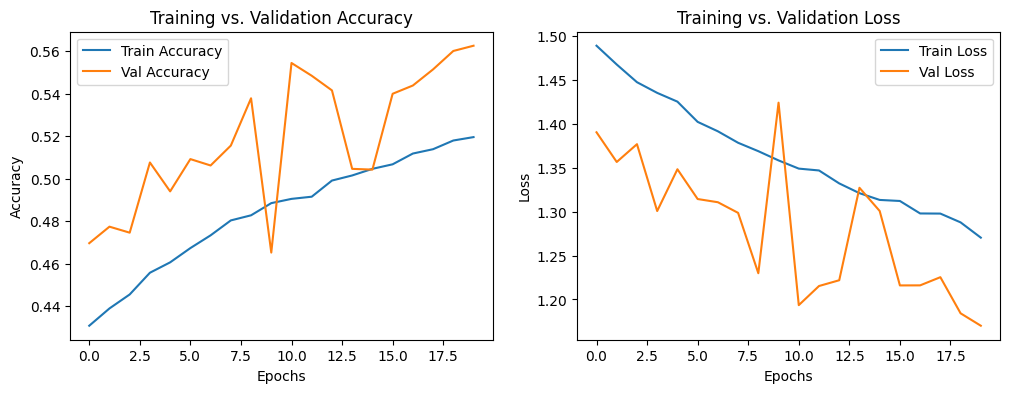

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy/loss
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training vs. Validation Accuracy')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training vs. Validation Loss')

    plt.show()

# Call the function
plot_training_history(history)


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load a new image for testing
img_path = '/content/drive/MyDrive/Colab Notebooks/SENIOR PROJECT/angry_guy.jpg'  # Replace with an actual path

# Define img_height and img_width
img_height = 48  # Replace with your desired height
img_width = 48   # Replace with your desired width

img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

# Predict the class
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)
print(f"Predicted Emotion Class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
Predicted Emotion Class: 0


In [ ]:
model.save("emotion_cnn_model.keras")
print("Model saved successfully.")


Model saved successfully.


Displaying some training images:


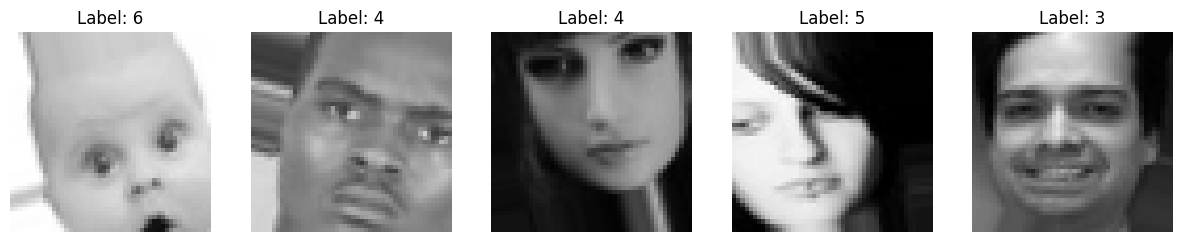

Displaying some validation images:


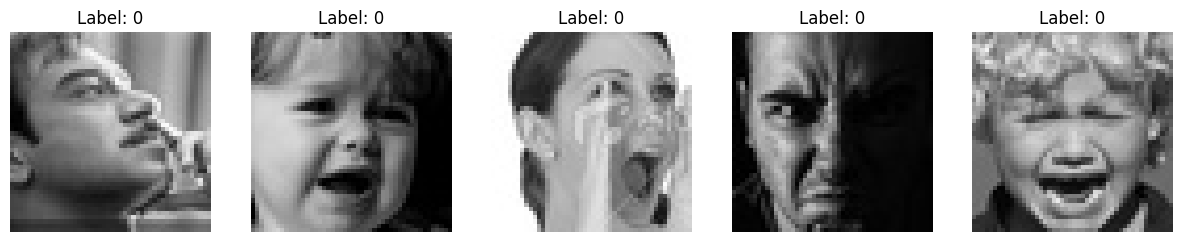

Displaying some test images:


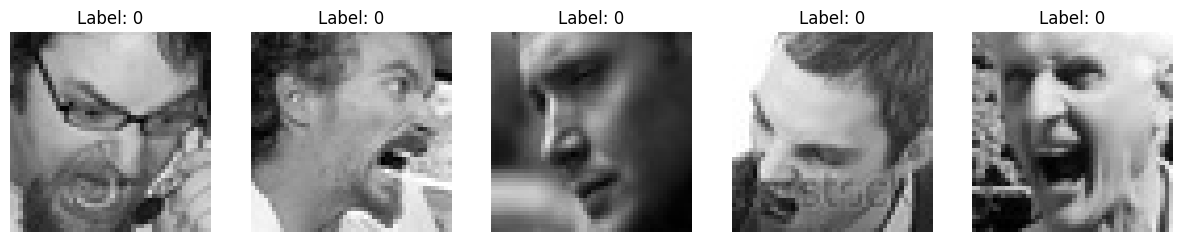


Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 46, 46, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 21, 21, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 2, 2, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 2, 2, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 655,047 (2.50 MB)

 Trainable params: 654,087 (2.50 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

# Function to load and display some sample images from a directory
def load_and_display_images(generator, num_images=5):
    images, labels = next(generator)  # Get a batch of images and labels
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        axes[i].imshow(images[i])  # Display the image
        axes[i].axis('off')  # Turn off axis for better display
        # Get the label
        label = np.argmax(labels[i])
        axes[i].set_title(f"Label: {label}")  # Display the label
    plt.show()

# Show a few samples from the training data
print("Displaying some training images:")
load_and_display_images(train_generator, num_images=5)

# Show a few samples from the validation data
print("Displaying some validation images:")
load_and_display_images(validation_generator, num_images=5)

# Show a few samples from the test data
print("Displaying some test images:")
load_and_display_images(test_generator, num_images=5)

# Show a summary of your model
print("\nModel Summary:")
model.summary()


____________________________________________________
## NLP MODEL TESTING SECTION
____________________________________________________



### Load data and explore dataset

In [2]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/SENIOR PROJECT/sentiment140/training.1600000.processed.noemoticon.csv'
df = pd.read_csv(file_path, encoding='latin-1', header=None)

# Assign column names
df.columns = ['target', 'ids', 'date', 'query', 'user', 'text']

# Inspect the first few rows of the dataset
df.head()


,target,ids,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


### Preprocess data

In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the punkt_tab resource

# Preprocessing function
def preprocess_text(text):
    # Remove URLs and usernames
    text = re.sub(r'http\S+|www\S+|@\S+', '', text)
    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Stemming
    ps = PorterStemmer()
    words = [ps.stem(word) for word in words]
    return ' '.join(words)

# Apply preprocessing to the 'text' column
df['processed_text'] = df['text'].apply(preprocess_text)

# Display a sample of the preprocessed data
df[['text', 'processed_text']].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,text,processed_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",that bummer shoulda got david carr third day
1,is upset that he can't update his Facebook by ...,upset cant updat facebook text might cri resul...
2,@Kenichan I dived many times for the ball. Man...,dive mani time ball manag save rest go bound
3,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,"@nationwideclass no, it's not behaving at all....",behav im mad cant see


### Vectorize text and build model

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Vectorize the text using TF-IDF
tfidf = TfidfVectorizer(max_features=5000, use_idf=True, stop_words='english')  # Increased feature limit
X = tfidf.fit_transform(df['processed_text'])

# Labels: 0 for negative, 4 for positive
y = df['target'].apply(lambda x: 1 if x == 4 else 0).values  # Convert target to binary (1 = positive, 0 = negative)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network model with added complexity
model = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation='relu'),  # Increased number of neurons
    Dropout(0.3),  # Increased dropout to prevent overfitting
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model with a slightly reduced learning rate
optimizer = Adam(learning_rate=0.0005)  # Slightly reduced learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Summary of the model
model.summary()

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping and a larger batch size
history = model.fit(X_train, y_train, epochs=10, batch_size=512, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

# Predict and get classification report
y_pred = (model.predict(X_test) > 0.5).astype("int32")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 256)                 │       1,280,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,321,473 (5.04 MB)

 Trainable params: 1,321,473 (5.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 225s 89ms/step - accuracy: 0.7390 - loss: 0.5219 - val_accuracy: 0.7691 - val_loss: 0.4779
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 255s 87ms/step - accuracy: 0.7755 - loss: 0.4705 - val_accuracy: 0.7744 - val_loss: 0.4704
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 262s 86ms/step - accuracy: 0.7911 - loss: 0.4452 - val_accuracy: 0.7762 - val_loss: 0.4689
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 262s 87ms/step - accuracy: 0.8070 - loss: 0.4186 - val_accuracy: 0.7752 - val_loss: 0.4740
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 286s 96ms/step - accuracy: 0.8199 - loss: 0.3940 - val_accuracy: 0.7735 - val_loss: 0.4837
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 259s 95ms/step - accuracy: 0.8320 - loss: 0.3714 - val_accuracy: 0.7714 - val_loss: 0.5003
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 61s 6ms/step - accuracy: 0.7758 - loss: 0.4682
Test Accuracy: 77.62%
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 6ms/step
              precision    recall  f1-score   support


### Predictions

In [8]:
import random # Import the random module

# Predict the sentiment of 20 random test samples
random_samples = random.sample(range(len(X_test.toarray())), 20)  # Get 20 random indices from the test set

# Get the texts and labels for these samples
sample_texts = [df.iloc[i]['processed_text'] for i in random_samples]
sample_labels = [y_test[i] for i in random_samples]

# Get predictions for these 20 samples
sample_predictions = (model.predict(X_test[random_samples]) > 0.5).astype("int32") # Replace best_model with model

# Print out the text, actual label, and predicted label
print("Predictions for 20 samples:")
for i in range(20):
    actual = 'positive' if sample_labels[i] == 1 else 'negative'
    predicted = 'positive' if sample_predictions[i] == 1 else 'negative'
    print(f"Text: {sample_texts[i]}\nActual: {actual}\nPredicted: {predicted}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
Predictions for 20 samples:
Text: wasnt asleep long thirti text
Actual: negative
Predicted: negative

Text: damn wan na cant im sad love sweeti
Actual: negative
Predicted: negative

Text: west elm wan na go cant believ earli got
Actual: positive
Predicted: positive

Text: go walk
Actual: negative
Predicted: negative

Text: that felt like nahulugan ako ng someth hard gtlt
Actual: negative
Predicted: positive

Text: disappoint
Actual: negative
Predicted: positive

Text: prayer one air franc flight famili sad
Actual: positive
Predicted: positive

Text: lucki ass wan na go giant game
Actual: negative
Predicted: negative

Text: hate school right lucki dont go
Actual: negative
Predicted: positive

Text: im super sleepi
Actual: positive
Predicted: positive

Text: diddi awak im also knick fan id rather get wade
Actual: positive
Predicted: positive

Text: go get readi school tommorow
Actual: negative
Predicted: negative

Text: lol look stone lol wan na mov